<a href="https://colab.research.google.com/github/ubirajarasegura/CA683-2022-Credit-Risk-Analysis/blob/main/analytics_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
df1 = pd.read_csv('application_data.csv', sep=',')
df2 = pd.read_csv('previous_application.csv', sep=',')
desc = pd.read_csv('columns_description.csv', sep=',', encoding='latin-1')

In [ ]:
df1.shape,df2.shape

((307511, 122), (1670214, 37))

In [ ]:
df1.SK_ID_CURR.isin(df2.SK_ID_CURR).mean()

0.9464929709831518

In [ ]:
#There are a lot of NAN instances, we are dropping them because we are interested in finding relevant features 
df1.isna().mean()[df1.isna().mean()>0].sort_values(ascending=False)

COMMONAREA_MEDI                 0.698723
COMMONAREA_AVG                  0.698723
COMMONAREA_MODE                 0.698723
NONLIVINGAPARTMENTS_AVG         0.694330
NONLIVINGAPARTMENTS_MODE        0.694330
NONLIVINGAPARTMENTS_MEDI        0.694330
FONDKAPREMONT_MODE              0.683862
LIVINGAPARTMENTS_AVG            0.683550
LIVINGAPARTMENTS_MEDI           0.683550
LIVINGAPARTMENTS_MODE           0.683550
FLOORSMIN_AVG                   0.678486
FLOORSMIN_MEDI                  0.678486
FLOORSMIN_MODE                  0.678486
YEARS_BUILD_AVG                 0.664978
YEARS_BUILD_MEDI                0.664978
YEARS_BUILD_MODE                0.664978
OWN_CAR_AGE                     0.659908
LANDAREA_AVG                    0.593767
LANDAREA_MEDI                   0.593767
LANDAREA_MODE                   0.593767
BASEMENTAREA_MODE               0.585160
BASEMENTAREA_AVG                0.585160
BASEMENTAREA_MEDI               0.585160
EXT_SOURCE_1                    0.563811
NONLIVINGAREA_AV

In [ ]:
pd.set_option('display.max_colwidth', -1)
desc[['Row','Description']]

In [ ]:
df_docs = df1[['FLAG_DOCUMENT_16','FLAG_DOCUMENT_13','FLAG_DOCUMENT_6','FLAG_DOCUMENT_14'
                ,'FLAG_DOCUMENT_8','FLAG_DOCUMENT_18','FLAG_DOCUMENT_15','FLAG_DOCUMENT_9','FLAG_DOCUMENT_11'
                ,'FLAG_DOCUMENT_17','FLAG_DOCUMENT_14','FLAG_DOCUMENT_7','FLAG_DOCUMENT_10','FLAG_DOCUMENT_19','FLAG_DOCUMENT_4'
                ,'FLAG_DOCUMENT_12','FLAG_DOCUMENT_5','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3'        
                ]]

df1.drop(columns=['FLAG_DOCUMENT_16','FLAG_DOCUMENT_13','FLAG_DOCUMENT_6','FLAG_DOCUMENT_14','FLAG_DOCUMENT_4'
                ,'FLAG_DOCUMENT_8','FLAG_DOCUMENT_18','FLAG_DOCUMENT_15','FLAG_DOCUMENT_9','FLAG_DOCUMENT_11'
                ,'FLAG_DOCUMENT_17','FLAG_DOCUMENT_7','FLAG_DOCUMENT_10','FLAG_DOCUMENT_19','FLAG_DOCUMENT_3'    
                ,'FLAG_DOCUMENT_12','FLAG_DOCUMENT_5','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_DOCUMENT_2'   
                ],inplace=True)

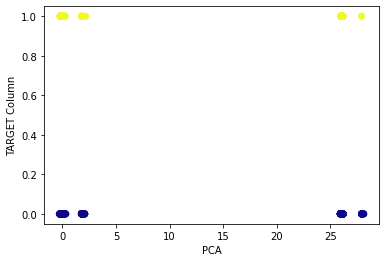

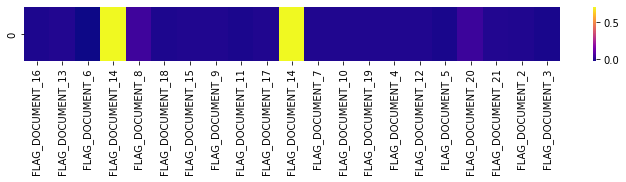

In [ ]:
scaled_data = StandardScaler().fit(df_docs).transform(df_docs)
pca = PCA(n_components=1).fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(6,4))
plt.scatter(x_pca[:], df1['TARGET'],c=df1['TARGET'],cmap='plasma')
plt.xlabel('PCA')
plt.ylabel('TARGET Column')

plt.figure(figsize=(12,1)).tight_layout()
sns.heatmap(pd.DataFrame(pca.components_,columns=df_docs.columns)
            ,cmap='plasma',)

df1['DOCS'] = x_pca

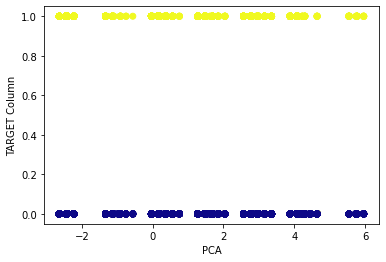

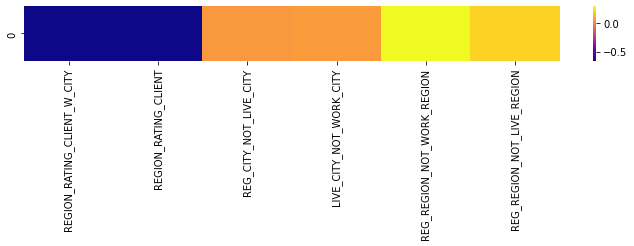

In [ ]:
#PCA on REGIONS
df_reg = df1[['REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT'
              ,'REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY'
              ,'REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION'
            ]]

df1.drop(columns=['REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT'
                  ,'REG_CITY_NOT_LIVE_CITY','LIVE_CITY_NOT_WORK_CITY'
                  ,'REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION'    
                 ]
         ,inplace=True)

scaled_data = StandardScaler().fit(df_reg).transform(df_reg)
pca = PCA(n_components=1).fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(6,4))
plt.scatter(x_pca[:], df1['TARGET'],c=df1['TARGET'],cmap='plasma')
plt.xlabel('PCA')
plt.ylabel('TARGET Column')

plt.figure(figsize=(12,1))
sns.heatmap(pd.DataFrame(pca.components_,columns=df_reg.columns)
            ,cmap='plasma',)

df1['REG'] = x_pca

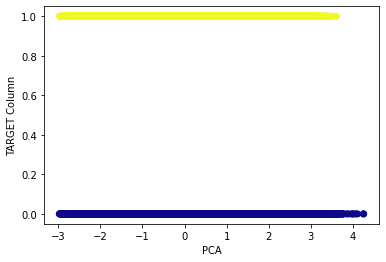

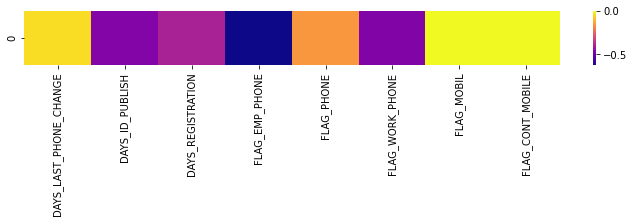

In [ ]:
#PCA on PHONE FLAGS

df1.dropna(subset=['DAYS_LAST_PHONE_CHANGE'],inplace=True)

df_phone = df1[['DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH'
              ,'DAYS_REGISTRATION','FLAG_EMP_PHONE','FLAG_PHONE'
              ,'FLAG_WORK_PHONE','FLAG_MOBIL','FLAG_CONT_MOBILE'
            ]]

df1.drop(columns=['DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH'
              ,'DAYS_REGISTRATION','FLAG_EMP_PHONE','FLAG_PHONE'
              ,'FLAG_WORK_PHONE','FLAG_MOBIL','FLAG_CONT_MOBILE'
                ]
          ,inplace=True)

scaled_data = StandardScaler().fit(df_phone).transform(df_phone)
pca = PCA(n_components=1).fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(6,4))
plt.scatter(x_pca[:], df1['TARGET'],c=df1['TARGET'],cmap='plasma')
plt.xlabel('PCA')
plt.ylabel('TARGET Column')

plt.figure(figsize=(12,1))
sns.heatmap(pd.DataFrame(pca.components_,columns=df_phone.columns)
            ,cmap='plasma',)

df1['PHONE'] = x_pca

In [ ]:
df_soc_circle =df1[['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'
                  , 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'
                  ,'AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2','DAYS_EMPLOYED','CNT_FAM_MEMBERS']]     

df_soc_circle.AMT_ANNUITY.fillna(27108.58, inplace=True)
df_soc_circle.EXT_SOURCE_2.fillna(0.5144, inplace=True)
df_soc_circle.CNT_FAM_MEMBERS.fillna(2.15, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#FE on DEF_30_CNT_SOCIAL_CIRCLE

X_train = df_soc_circle.dropna()[['AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2'
                                  ,'DAYS_EMPLOYED','CNT_FAM_MEMBERS']]
y_train = df_soc_circle.dropna()['DEF_30_CNT_SOCIAL_CIRCLE']
X_test = df_soc_circle[df_soc_circle.DEF_30_CNT_SOCIAL_CIRCLE.isna()==True][['AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2'
                                                                            ,'DAYS_EMPLOYED','CNT_FAM_MEMBERS']]

y_test = df_soc_circle[df_soc_circle.DEF_30_CNT_SOCIAL_CIRCLE.isna()==True]['DEF_30_CNT_SOCIAL_CIRCLE']

#importing linear regression from SK Learn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.DEF_30_CNT_SOCIAL_CIRCLE.isna()==True, ['DEF_30_CNT_SOCIAL_CIRCLE']
         ]  = lm.predict(X_test)

In [ ]:
#FE on DEF_60_CNT_SOCIAL_CIRCLE

X_train = df_soc_circle.dropna()[['AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2'
                                  ,'DAYS_EMPLOYED','CNT_FAM_MEMBERS']]
y_train = df_soc_circle.dropna()['DEF_60_CNT_SOCIAL_CIRCLE']
X_test = df_soc_circle[df_soc_circle.DEF_60_CNT_SOCIAL_CIRCLE.isna()==True][['AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2'
                                                                            ,'DAYS_EMPLOYED','CNT_FAM_MEMBERS']]

y_test = df_soc_circle[df_soc_circle.DEF_60_CNT_SOCIAL_CIRCLE.isna()==True]['DEF_60_CNT_SOCIAL_CIRCLE']

#importing linear regression from SK Learn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.DEF_60_CNT_SOCIAL_CIRCLE.isna()==True, ['DEF_60_CNT_SOCIAL_CIRCLE']
         ]  = lm.predict(X_test)

In [ ]:
#FE on OBS_30_CNT_SOCIAL_CIRCLE

X_train = df_soc_circle.dropna()[['AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2'
                                  ,'DAYS_EMPLOYED','CNT_FAM_MEMBERS']]
y_train = df_soc_circle.dropna()['OBS_30_CNT_SOCIAL_CIRCLE']
X_test = df_soc_circle[df_soc_circle.OBS_30_CNT_SOCIAL_CIRCLE.isna()==True][['AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2'
                                                                            ,'DAYS_EMPLOYED','CNT_FAM_MEMBERS']]

y_test = df_soc_circle[df_soc_circle.OBS_30_CNT_SOCIAL_CIRCLE.isna()==True]['OBS_30_CNT_SOCIAL_CIRCLE']

#importing linear regression from SK Learn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.OBS_30_CNT_SOCIAL_CIRCLE.isna()==True, ['OBS_30_CNT_SOCIAL_CIRCLE']
         ]  = lm.predict(X_test)

In [ ]:
#FE on OBS_60_CNT_SOCIAL_CIRCLE

X_train = df_soc_circle.dropna()[['AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2'
                                  ,'DAYS_EMPLOYED','CNT_FAM_MEMBERS']]
y_train = df_soc_circle.dropna()['OBS_60_CNT_SOCIAL_CIRCLE']
X_test = df_soc_circle[df_soc_circle.OBS_60_CNT_SOCIAL_CIRCLE.isna()==True][['AMT_ANNUITY', 'AMT_CREDIT','EXT_SOURCE_2'
                                                                            ,'DAYS_EMPLOYED','CNT_FAM_MEMBERS']]

y_test = df_soc_circle[df_soc_circle.OBS_60_CNT_SOCIAL_CIRCLE.isna()==True]['OBS_60_CNT_SOCIAL_CIRCLE']

#importing linear regression from SK Learn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.OBS_60_CNT_SOCIAL_CIRCLE.isna()==True, ['OBS_60_CNT_SOCIAL_CIRCLE']
         ]  = lm.predict(X_test)

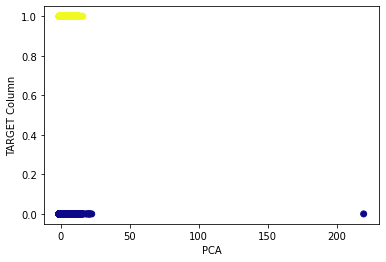

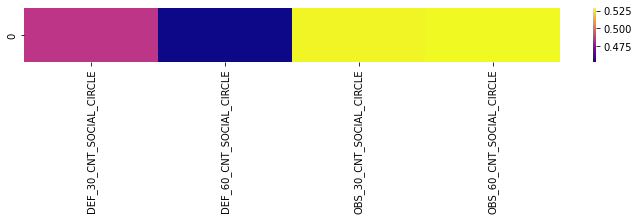

In [ ]:
#PCA on SOCIAL_CIRCLE

df_SC = df1[['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'
            , 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']]

df1.drop(columns=['DEF_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE'
              ,'DEF_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE']
          ,inplace=True)

scaled_data = StandardScaler().fit(df_SC).transform(df_SC)
pca = PCA(n_components=1).fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(6,4))
plt.scatter(x_pca[:], df1['TARGET'],c=df1['TARGET'],cmap='plasma')
plt.xlabel('PCA')
plt.ylabel('TARGET Column')

plt.figure(figsize=(12,1))
sns.heatmap(pd.DataFrame(pca.components_,columns=df_SC.columns)
            ,cmap='plasma',)

df1['SOCIAL_CIRCLE_DEF'] = x_pca

In [ ]:
#Não há nada fortemente correlacionado, NAN realmente é missing
df1[df1.AMT_REQ_CREDIT_BUREAU_YEAR.isna()==True]['AMT_REQ_CREDIT_BUREAU_YEAR'] =  1.9

df1.drop(columns=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                  'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT'],inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]]     

df1.drop(columns=['LANDAREA_AVG','LANDAREA_MEDI','NONLIVINGAREA_MEDI'
                  ,'NONLIVINGAREA_AVG','COMMONAREA_AVG','COMMONAREA_MEDI'
                  ,'ENTRANCES_MEDI','ENTRANCES_AVG','BASEMENTAREA_MEDI'
                  ,'BASEMENTAREA_AVG','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_AVG'
               ],inplace=True)                

df_build.NONLIVINGAREA_MODE.fillna(0.0270, inplace=True)
df_build.COMMONAREA_MODE.fillna(0.0426, inplace=True)
df_build.ENTRANCES_MODE.fillna(0.1452, inplace=True)
df_build.BASEMENTAREA_MODE.fillna(0.0875, inplace=True)
df_build.YEARS_BUILD_MODE.fillna(0.7596, inplace=True)
df_build.LIVINGAPARTMENTS_MODE.fillna(0.1056, inplace=True)
df_build.FLOORSMAX_MODE.fillna(0.2223, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#FE on LANDAREA_MODE

X_train = df_build.dropna().drop(columns='LANDAREA_MODE')
y_train = df_build.dropna()['LANDAREA_MODE']
X_test = df_build[df_build.LANDAREA_MODE.isna()==True].drop(columns='LANDAREA_MODE')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.LANDAREA_MODE.isna()==True, ['LANDAREA_MODE']
         ]  = lm.predict(X_test)

In [ ]:
#FE on NONLIVINGAREA_MODE

X_train = df_build.dropna().drop(columns='NONLIVINGAREA_MODE')
y_train = df_build.dropna()['NONLIVINGAREA_MODE']

df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]] 

df_build.COMMONAREA_MODE.fillna(0.0426, inplace=True)
df_build.ENTRANCES_MODE.fillna(0.1452, inplace=True)
df_build.BASEMENTAREA_MODE.fillna(0.0875, inplace=True)
df_build.YEARS_BUILD_MODE.fillna(0.7596, inplace=True)
df_build.LIVINGAPARTMENTS_MODE.fillna(0.1056, inplace=True)
df_build.FLOORSMAX_MODE.fillna(0.2223, inplace=True)

X_test = df_build[df_build.NONLIVINGAREA_MODE.isna()==True].drop(columns='NONLIVINGAREA_MODE')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.NONLIVINGAREA_MODE.isna()==True, ['NONLIVINGAREA_MODE']
         ]  = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#FE on NONLIVINGAREA_MODE

X_train = df_build.dropna().drop(columns='COMMONAREA_MODE')
y_train = df_build.dropna()['COMMONAREA_MODE']

df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]] 
               
df_build.ENTRANCES_MODE.fillna(0.1452, inplace=True)
df_build.BASEMENTAREA_MODE.fillna(0.0875, inplace=True)
df_build.YEARS_BUILD_MODE.fillna(0.7596, inplace=True)
df_build.LIVINGAPARTMENTS_MODE.fillna(0.1056, inplace=True)
df_build.FLOORSMAX_MODE.fillna(0.2223, inplace=True)

X_test = df_build[df_build.COMMONAREA_MODE.isna()==True].drop(columns='COMMONAREA_MODE')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.COMMONAREA_MODE.isna()==True, ['COMMONAREA_MODE']
         ]  = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#FE on NONLIVINGAREA_MODE

X_train = df_build.dropna().drop(columns='ENTRANCES_MODE')
y_train = df_build.dropna()['ENTRANCES_MODE']

df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]] 

df_build.BASEMENTAREA_MODE.fillna(0.0875, inplace=True)
df_build.YEARS_BUILD_MODE.fillna(0.7596, inplace=True)
df_build.LIVINGAPARTMENTS_MODE.fillna(0.1056, inplace=True)
df_build.FLOORSMAX_MODE.fillna(0.2223, inplace=True)

X_test = df_build[df_build.ENTRANCES_MODE.isna()==True].drop(columns='ENTRANCES_MODE')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.ENTRANCES_MODE.isna()==True, ['ENTRANCES_MODE']
         ]  = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#FE on NONLIVINGAREA_MODE

X_train = df_build.dropna().drop(columns='BASEMENTAREA_MODE')
y_train = df_build.dropna()['BASEMENTAREA_MODE']

df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]] 
               
df_build.YEARS_BUILD_MODE.fillna(0.7596, inplace=True)
df_build.LIVINGAPARTMENTS_MODE.fillna(0.1056, inplace=True)
df_build.FLOORSMAX_MODE.fillna(0.2223, inplace=True)

X_test = df_build[df_build.BASEMENTAREA_MODE.isna()==True].drop(columns='BASEMENTAREA_MODE')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.BASEMENTAREA_MODE.isna()==True, ['BASEMENTAREA_MODE']
         ]  = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#FE on NONLIVINGAREA_MODE

X_train = df_build.dropna().drop(columns='YEARS_BUILD_MODE')
y_train = df_build.dropna()['YEARS_BUILD_MODE']

df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]] 
               
df_build.LIVINGAPARTMENTS_MODE.fillna(0.1056, inplace=True)
df_build.FLOORSMAX_MODE.fillna(0.2223, inplace=True)

X_test = df_build[df_build.YEARS_BUILD_MODE.isna()==True].drop(columns='YEARS_BUILD_MODE')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.YEARS_BUILD_MODE.isna()==True, ['YEARS_BUILD_MODE']
         ]  = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#FE on NONLIVINGAREA_MODE

X_train = df_build.dropna().drop(columns='LIVINGAPARTMENTS_MODE')
y_train = df_build.dropna()['LIVINGAPARTMENTS_MODE']

df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]] 

df_build.FLOORSMAX_MODE.fillna(0.2223, inplace=True)

X_test = df_build[df_build.LIVINGAPARTMENTS_MODE.isna()==True].drop(columns='LIVINGAPARTMENTS_MODE')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.LIVINGAPARTMENTS_MODE.isna()==True, ['LIVINGAPARTMENTS_MODE']
         ]  = lm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#FE on NONLIVINGAREA_MODE

X_train = df_build.dropna().drop(columns='FLOORSMAX_MODE')
y_train = df_build.dropna()['FLOORSMAX_MODE']

df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]] 

X_test = df_build[df_build.FLOORSMAX_MODE.isna()==True].drop(columns='FLOORSMAX_MODE')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.FLOORSMAX_MODE.isna()==True, ['FLOORSMAX_MODE']
         ]  = lm.predict(X_test)

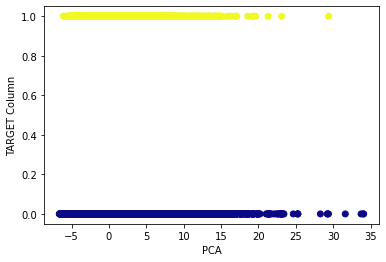

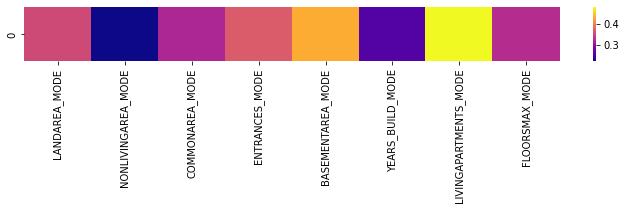

In [ ]:
#PCA on SOCIAL_CIRCLE

df_build =df1[['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE',
               'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ]]    

df1.drop(columns=['LANDAREA_MODE', 'NONLIVINGAREA_MODE', 'COMMONAREA_MODE','ENTRANCES_MODE'
                  ,'BASEMENTAREA_MODE','YEARS_BUILD_MODE','LIVINGAPARTMENTS_MODE','FLOORSMAX_MODE'
               ],inplace=True)  

scaled_data = StandardScaler().fit(df_build).transform(df_build)
pca = PCA(n_components=1).fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(6,4))
plt.scatter(x_pca[:], df1['TARGET'],c=df1['TARGET'],cmap='plasma')
plt.xlabel('PCA')
plt.ylabel('TARGET Column')

plt.figure(figsize=(12,1))
sns.heatmap(pd.DataFrame(pca.components_,columns=df_build.columns)
            ,cmap='plasma',)

df1['HOME'] = x_pca

In [ ]:
#finding highly linear correlated features with not car owners
df1[df1.OWN_CAR_AGE.isna()==True].corr()['TARGET'].sort_values(ascending=False)

TARGET                          1.000000
DAYS_BIRTH                      0.092280
REG_CITY_NOT_WORK_CITY          0.062210
DEF_60_CNT_SOCIAL_CIRCLE        0.031591
CNT_CHILDREN                    0.029301
SOCIAL_CIRCLE_DEF               0.023564
CNT_FAM_MEMBERS                 0.019620
AMT_REQ_CREDIT_BUREAU_YEAR      0.014227
LIVE_REGION_NOT_WORK_REGION     0.009743
OBS_30_CNT_SOCIAL_CIRCLE        0.007262
OBS_60_CNT_SOCIAL_CIRCLE        0.007133
AMT_INCOME_TOTAL                0.002841
NONLIVINGAPARTMENTS_MODE       -0.000369
FLAG_EMAIL                     -0.000598
NONLIVINGAPARTMENTS_MEDI       -0.001417
NONLIVINGAPARTMENTS_AVG        -0.001802
SK_ID_CURR                     -0.002033
AMT_ANNUITY                    -0.006289
DOCS                           -0.008874
YEARS_BEGINEXPLUATATION_MODE   -0.010965
YEARS_BEGINEXPLUATATION_AVG    -0.011669
YEARS_BEGINEXPLUATATION_MEDI   -0.011818
YEARS_BUILD_AVG                -0.020217
HOME                           -0.020295
YEARS_BUILD_MEDI

In [ ]:
#FE on car owning

X_train = df1.dropna()[['REG_CITY_NOT_WORK_CITY', 'PHONE', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE']]
y_train = df1.dropna()['OWN_CAR_AGE']
X_test = df1[df1.OWN_CAR_AGE.isna()==True][['REG_CITY_NOT_WORK_CITY', 'PHONE', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE']]
y_test = df1[df1.OWN_CAR_AGE.isna()==True]['OWN_CAR_AGE']

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

df1.loc[
          df1.OWN_CAR_AGE.isna()==True, ['OWN_CAR_AGE']
         ]  = lm.predict(
                          df1[df1.OWN_CAR_AGE.isna()==True][['REG_CITY_NOT_WORK_CITY', 'PHONE'
                                                                , 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE']]
                        )

In [ ]:
#############################

In [ ]:
df1_cat = df1[['NAME_CONTRACT_TYPE',
                'CODE_GENDER',
                'FLAG_OWN_CAR',
                'FLAG_OWN_REALTY',
                'NAME_TYPE_SUITE',
                'NAME_INCOME_TYPE',
                'NAME_EDUCATION_TYPE',
                'NAME_FAMILY_STATUS',
                'NAME_HOUSING_TYPE',
                'OCCUPATION_TYPE','SK_ID_CURR']]

In [ ]:
df1_cat.loc[ df1_cat.NAME_TYPE_SUITE.isna()==True, ['NAME_TYPE_SUITE'] ]  = "not_defined"
df1_cat.loc[ df1_cat.OCCUPATION_TYPE.isna()==True, ['OCCUPATION_TYPE'] ]  = "not_defined"

In [ ]:
df1_cat = pd.get_dummies(df1_cat, columns=['NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY',
                                        'NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                                        'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'])

In [ ]:
test1 = df1[['SK_ID_CURR','EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','PHONE','REG'
,'DAYS_EMPLOYED','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','AMT_INCOME_TOTAL'
,'AMT_CREDIT','HOME','AMT_ANNUITY','DOCS'
,'DAYS_BIRTH','REG_CITY_NOT_WORK_CITY','OWN_CAR_AGE','SOCIAL_CIRCLE_DEF','CNT_CHILDREN','TARGET']]

In [ ]:
test1 = test1.merge(df1_cat, on='SK_ID_CURR', how='left', indicator=True)
test1._merge.value_counts()

both          307510
right_only    0     
left_only     0     
Name: _merge, dtype: int64

In [ ]:
df_fe = test1[['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1']]              

df_fe.loc[
          df_fe.EXT_SOURCE_2.isna()==True, ['EXT_SOURCE_2']
         ]  = df_fe.EXT_SOURCE_2.mean()

df_fe.loc[
          df_fe.EXT_SOURCE_1.isna()==True, ['EXT_SOURCE_1']
         ]  = df_fe.EXT_SOURCE_1.mean()         

In [ ]:
#FE on EXT_SOURCE_3

X_train = df_fe.dropna().drop(columns='EXT_SOURCE_3')
y_train = df_fe.dropna()['EXT_SOURCE_3']

X_test = df_fe[df_fe.EXT_SOURCE_3.isna()==True].drop(columns='EXT_SOURCE_3')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

test1.loc[
          test1.EXT_SOURCE_3.isna()==True, ['EXT_SOURCE_3']
         ]  = lm.predict(X_test)

In [ ]:
#FE on EXT_SOURCE_1

X_train = df_fe.dropna().drop(columns='EXT_SOURCE_1')
y_train = df_fe.dropna()['EXT_SOURCE_1']

df_fe = test1[['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1']]              

df_fe.loc[
          df_fe.EXT_SOURCE_2.isna()==True, ['EXT_SOURCE_2']
         ]  = df_fe.EXT_SOURCE_2.mean()

df_fe.loc[
          df_fe.EXT_SOURCE_3.isna()==True, ['EXT_SOURCE_3']
         ]  = df_fe.EXT_SOURCE_3.mean()     

X_test = df_fe[df_fe.EXT_SOURCE_1.isna()==True].drop(columns='EXT_SOURCE_1')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

test1.loc[
          test1.EXT_SOURCE_1.isna()==True, ['EXT_SOURCE_1']
         ]  = lm.predict(X_test)

In [ ]:
#FE on EXT_SOURCE_2

X_train = df_fe.dropna().drop(columns='EXT_SOURCE_2')
y_train = df_fe.dropna()['EXT_SOURCE_2']

df_fe = test1[['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1']]              

df_fe.loc[
          df_fe.EXT_SOURCE_1.isna()==True, ['EXT_SOURCE_1']
         ]  = df_fe.EXT_SOURCE_1.mean()

df_fe.loc[
          df_fe.EXT_SOURCE_3.isna()==True, ['EXT_SOURCE_3']
         ]  = df_fe.EXT_SOURCE_3.mean()     

X_test = df_fe[df_fe.EXT_SOURCE_2.isna()==True].drop(columns='EXT_SOURCE_2')

#importing linear regression from SK Learn
lm = LinearRegression()
lm.fit(X_train,y_train)

test1.loc[
          test1.EXT_SOURCE_2.isna()==True, ['EXT_SOURCE_2']
         ]  = lm.predict(X_test)

In [ ]:
#Aplicando média pq é menos de 1% da treino e o SD é bbaixo
test1.loc[
          test1.AMT_GOODS_PRICE.isna()==True, ['AMT_GOODS_PRICE']
         ]  = test1.AMT_GOODS_PRICE.mean()

test1.loc[
          test1.AMT_ANNUITY.isna()==True, ['AMT_ANNUITY']
         ]  = test1.AMT_ANNUITY.mean()                                              

In [ ]:
test1.isna().sum()

SK_ID_CURR                                           0
EXT_SOURCE_3                                         0
EXT_SOURCE_2                                         0
EXT_SOURCE_1                                         0
PHONE                                                0
REG                                                  0
DAYS_EMPLOYED                                        0
AMT_GOODS_PRICE                                      0
REGION_POPULATION_RELATIVE                           0
AMT_INCOME_TOTAL                                     0
AMT_CREDIT                                           0
HOME                                                 0
AMT_ANNUITY                                          0
DOCS                                                 0
DAYS_BIRTH                                           0
REG_CITY_NOT_WORK_CITY                               0
OWN_CAR_AGE                                          0
SOCIAL_CIRCLE_DEF                                    0
CNT_CHILDR

In [ ]:
#test1.dropna(inplace=True)

In [ ]:
#sns.pairplot(df1)

# FULL MODEL

In [ ]:
test1.shape[0], df1.shape[0]

(307510, 307510)

In [ ]:
test1.drop(columns=['_merge'],inplace=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


X = test1.drop('TARGET',axis=1)
y = test1['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

pred = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     84780
           1       0.14      0.16      0.15      7473

    accuracy                           0.85     92253
   macro avg       0.53      0.54      0.53     92253
weighted avg       0.86      0.85      0.86     92253



In [ ]:
print(confusion_matrix(y_test,pred))

[[77341  7439]
 [ 6269  1204]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

pred2 = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84780
           1       0.83      0.00      0.00      7473

    accuracy                           0.92     92253
   macro avg       0.88      0.50      0.48     92253
weighted avg       0.91      0.92      0.88     92253



In [ ]:
print(confusion_matrix(y_test,pred2)) 

[[84778     2]
 [ 7463    10]]


In [ ]:
test1[test1.TARGET==0]['TARGET'].count()/test1.shape[0]

0.9192709180189262

In [ ]:
test1[test1.TARGET>0]['TARGET'].count()/test1.shape[0]

0.08072908198107379

# UNBIASING

In [ ]:
test2 = test1[test1.TARGET==0].sample(24825 )
test2 = test2.append(test1[test1.TARGET>0])
test2.TARGET.value_counts()

1    24825
0    24825
Name: TARGET, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = test2.drop('TARGET',axis=1)
y = test2['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

pred3 = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58      7465
           1       0.58      0.58      0.58      7430

    accuracy                           0.58     14895
   macro avg       0.58      0.58      0.58     14895
weighted avg       0.58      0.58      0.58     14895



In [ ]:
print(confusion_matrix(y_test,pred3))

[[4351 3114]
 [3100 4330]]


In [ ]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

pred4 = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68      7465
           1       0.68      0.67      0.67      7430

    accuracy                           0.68     14895
   macro avg       0.68      0.68      0.68     14895
weighted avg       0.68      0.68      0.68     14895



In [ ]:
print(confusion_matrix(y_test,pred4))

[[5087 2378]
 [2436 4994]]


#Deep Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [ ]:
X = test2.drop('TARGET',axis=1).values
y = test2['TARGET'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape[0], y_train.shape[0], X_test.shape[0],y_test.shape[0]

(34755, 34755, 14895, 14895)

In [ ]:
X_train.shape

(34755, 80)

In [ ]:
model = Sequential()

#number of columns is the initial
model.add(Dense(80, activation='relu'))
#half of neurons are shutdown on each epoch
model.add(Dropout(0.5))

model.add(Dense(160, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(320, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(160, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(80, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(40, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4, activation='relu'))
model.add(Dropout(0.5))

#binary classfication
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

#We can use a large epochs now
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x= X_train, y = y_train,
          epochs=1000,
          validation_data=(X_test,y_test),
          batch_size=128,
          callbacks=[early_stop])

Epoch 1/1000
272/272 [==============================] - 3s 7ms/step - loss: 0.6978 - val_loss: 0.6932
Epoch 2/1000
272/272 [==============================] - 2s 6ms/step - loss: 0.6934 - val_loss: 0.6931
Epoch 3/1000
272/272 [==============================] - 2s 6ms/step - loss: 0.6928 - val_loss: 0.6932
Epoch 4/1000
272/272 [==============================] - 2s 6ms/step - loss: 0.6894 - val_loss: 0.6891
Epoch 5/1000
272/272 [==============================] - 2s 6ms/step - loss: 0.6838 - val_loss: 0.6846
Epoch 6/1000
272/272 [==============================] - 2s 6ms/step - loss: 0.6793 - val_loss: 0.6785
Epoch 7/1000
272/272 [==============================] - 2s 6ms/step - loss: 0.6762 - val_loss: 0.6812
Epoch 8/1000
272/272 [==============================] - 2s 6ms/step - loss: 0.6744 - val_loss: 0.6790
Epoch 9/1000
272/272 [==============================] - 2s 6ms/step - loss: 0.6711 - val_loss: 0.6708
Epoch 10/1000
272/272 [==============================] - 2s 6ms/step - loss: 0.669

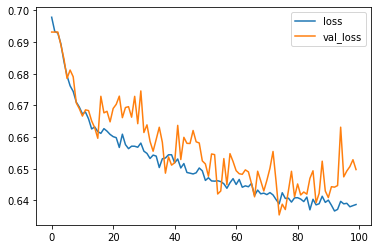

In [ ]:
pd.DataFrame(model.history.history).plot()

In [ ]:
model.evaluate(X_test, y_test, verbose=0)

0.6497264504432678

In [ ]:
model.evaluate(X_train, y_train, verbose=0)

0.626147985458374

In [ ]:
test_predictions = model.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(14895,))
pred_df = pd.DataFrame(y_test)#, columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions], axis=1)
pred_df.columns = ['Test_true_Y',"Model_predictions"]

In [ ]:
print('Relação MAE média: ',
      mean_absolute_error(pred_df['Test_true_Y'], pred_df['Model_predictions']),#/test2.Open.mean()*100, 2),"%",
      '\nMSE: ',mean_squared_error(pred_df['Test_true_Y'], pred_df['Model_predictions']),
      '\nRMSE: ',mean_squared_error(pred_df['Test_true_Y'], pred_df['Model_predictions'])**0.5              
  )

Relação MAE média:  0.4629381655066075 
MSE:  0.22495576736453493 
RMSE:  0.47429502144186053


In [ ]:
print(classification_report(np.round(test_predictions),y_test))

              precision    recall  f1-score   support

         0.0       0.80      0.63      0.70      9610
         1.0       0.52      0.72      0.60      5285

    accuracy                           0.66     14895
   macro avg       0.66      0.67      0.65     14895
weighted avg       0.70      0.66      0.67     14895



In [ ]:
print(confusion_matrix(np.round(test_predictions),y_test))

[[6008 3602]
 [1457 3828]]


In [ ]:
pred_df.Model_predictions = pred_df.Model_predictions.apply(lambda x: np.round(x))

In [ ]:
pred_df.sample(10)

,Test_true_Y,Model_predictions
13255,0,0.0
12417,1,1.0
13774,1,1.0
11942,0,0.0
9472,0,0.0
12793,1,0.0
2200,0,0.0
9063,0,0.0
3167,1,1.0
7188,0,0.0


In [ ]:
#Test new value
new = [['260','40000000000']]
new = scaler.transform(new)
print(model.predict(new))

In [ ]:
#Optimization

#explained_variance_score(y_test, predictions)
#1.0 good, 0 poor

#plt,figure